In [ ]:
library("feather")
library("lme4")
library("lmerTest")
library("ggplot2")
library("sjPlot")
require("MuMIn")
library("xlsx")
library("car")

In [2]:
df <-  read_feather("/Users/hun/Google Drive/HSE/PhD/PhD thesis/data/df_regr_instance_agg.feather")

Warning message:
“Coercing int64 to double”Warning message:
“Coercing int64 to double”

In [3]:
sum(is.na(df$is_ethicity_dangerous_meaning_value))

[1] 2420

In [4]:
sum(is.na(df$is_ethicity_aggressor_meaning_value))

[1] 20793

In [5]:
sum(is.na(df$is_ethicity_superior_meaning_value))

[1] 19373

In [6]:
dim(df)

[1] 26963    53

In [7]:
names(df)

[1] "instance_id"                         
 [2] "about_whole_nation_recoded_value"    
 [3] "assessor"                            
 [4] "comment"                             
 [5] "date"                                
 [6] "document.id"                         
 [7] "do_text_make_sense_raw_value"        
 [8] "encourage_aggression_meaning_value"  
 [9] "eth_group_to_code"                   
[10] "has_eth_conflict_raw_value"          
[11] "has_ethnonym_raw_value"              
[12] "has_pos_eth_interaction_raw_value"   
[13] "has_topic_culture_value"             
[14] "has_topic_daily_routine_value"       
[15] "has_topic_economics_value"           
[16] "has_topic_ethicity_value"            
[17] "has_topic_history_value"             
[18] "has_topic_humour_value"              
[19] "has_topic_migration_value"           
[20] "has_topic_other_value"               
[21] "has_topic_politics_value"            
[22] "has_topic_religion_value"            
[23] "has_topic_society_social_value"      
[24] "is_ethicity_aggressor_meaning_value" 
[25] "is_ethicity_dangerous_meaning_value" 
[26] "is_ethicity_superior_meaning_value"  
[27] "is_text_neg_raw_value"               
[28] "is_text_positive_raw_value"          
[29] "opinion_about_ethnonym_recoded_value"
[30] "represent_ethicity_meaning_value"    
[31] "seed_eth_group"                      
[32] "source"                              
[33] "stage"                               
[34] "source_text"                         
[35] "lemm_text"                           
[36] "city"                                
[37] "region"                              
[38] "created_date"                        
[39] "auth_age"                            
[40] "auth_gender"                         
[41] "auth_geo"                            
[42] "auth_name"                           
[43] "auth_nick"                           
[44] "auth_source"                         
[45] "doc_date"                            
[46] "domain"                              
[47] "doc_url"                             
[48] "ethno"                               
[49] "cntry"                               
[50] "pos"                                 
[51] "neg"                                 
[52] "words_num"                           
[53] "aggregated_groups"

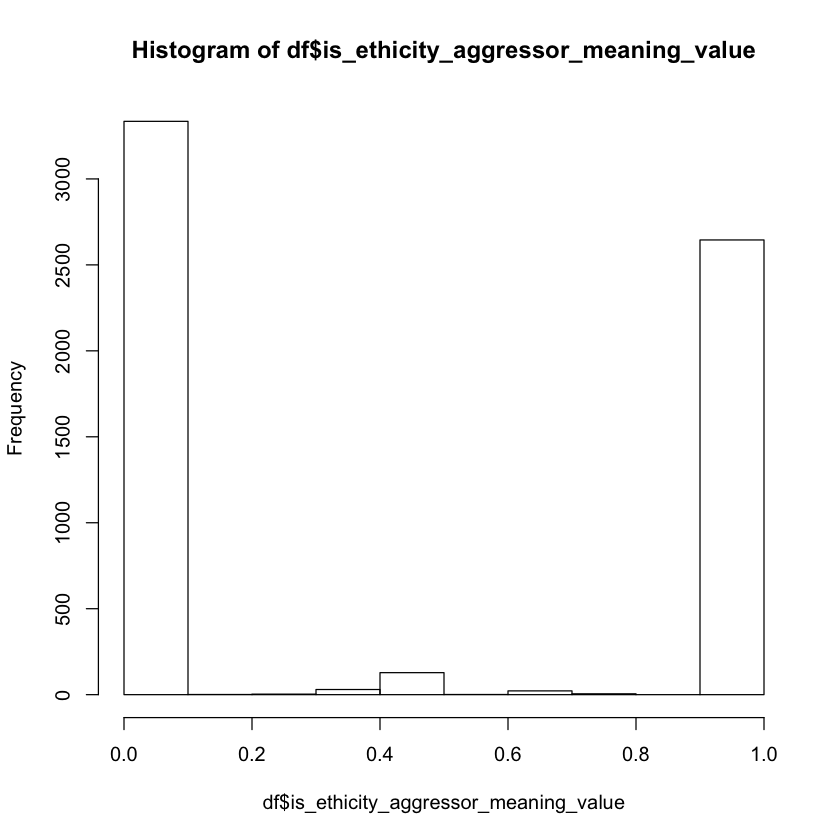

In [8]:
hist(df$is_ethicity_aggressor_meaning_value)

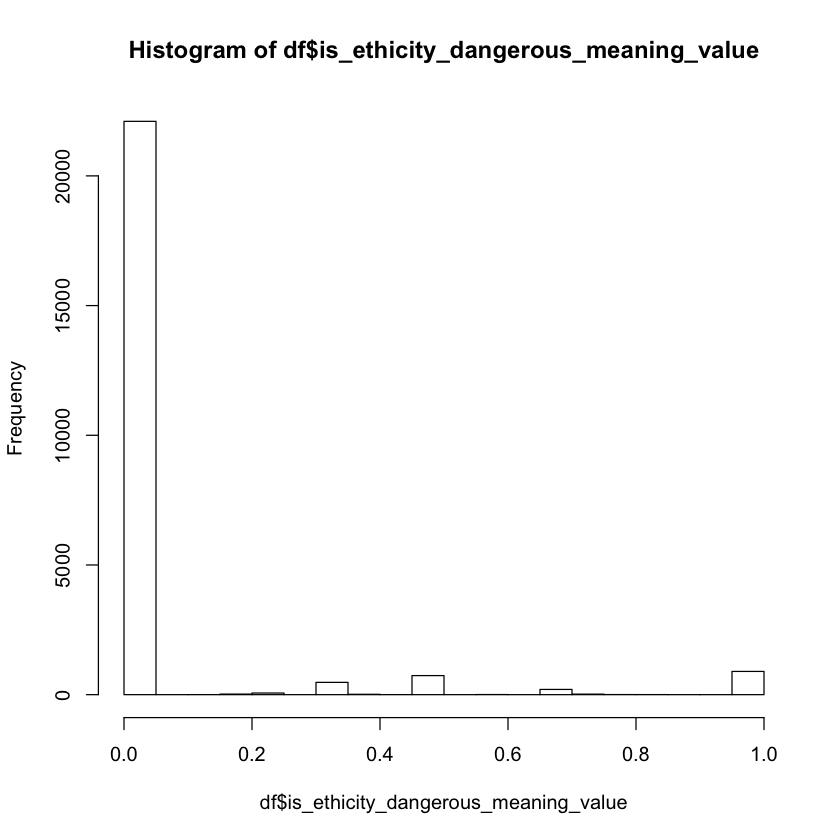

In [124]:
hist(df$is_ethicity_dangerous_meaning_value)

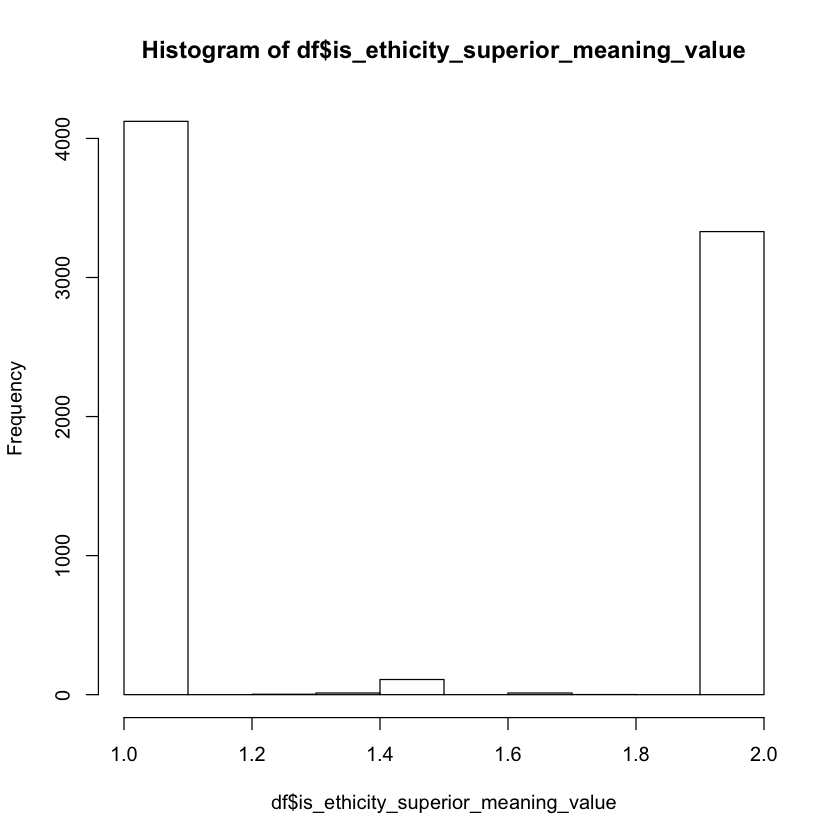

In [125]:
hist(df$is_ethicity_superior_meaning_value)

In [9]:
df$represent_ethicity_meaning_value = ifelse(df$represent_ethicity_meaning_value > 0.5, 1, 0)
df$is_ethicity_aggressor_meaning_value = ifelse(df$is_ethicity_aggressor_meaning_value > 0.5, 1, 0)
df$is_ethicity_dangerous_meaning_value = ifelse(df$is_ethicity_dangerous_meaning_value > 0.5, 1, 0)
df$is_ethicity_superior_meaning_value = ifelse(df$is_ethicity_superior_meaning_value > 1.5, 1, 0)

In [10]:
df$document.id = as.factor(df$document.id)
df$represent_ethicity_meaning_value = as.factor(df$represent_ethicity_meaning_value)
df$is_ethicity_aggressor_meaning_value = as.factor(df$is_ethicity_aggressor_meaning_value)
df$is_ethicity_dangerous_meaning_value = as.factor(df$is_ethicity_dangerous_meaning_value)
df$is_ethicity_superior_meaning_value = as.factor(df$is_ethicity_superior_meaning_value)
df$opinion_about_ethnonym_recoded_value = as.numeric(df$opinion_about_ethnonym_recoded_value)
df$eth_group_to_code = as.factor(df$eth_group_to_code)
df$aggregated_groups = as.factor(df$aggregated_groups)
df$auth_gender = as.factor(df$auth_gender)
df$region = as.factor(df$region)

In [11]:
table(df$is_ethicity_aggressor_meaning_value)


   0    1 
3497 2673 

In [12]:
table(df$is_ethicity_superior_meaning_value)


   0    1 
4247 3343 

In [13]:
table(df$is_ethicity_dangerous_meaning_value)


    0     1 
23413  1130 

In [14]:
represent_add_0 = lmer(opinion_about_ethnonym_recoded_value ~ 
               represent_ethicity_meaning_value * auth_gender +
               (1|eth_group_to_code) +
               (1|region) +
               (1|document.id),
             data=df, REML = F)

In [16]:
r.squaredGLMM(represent_add_0)

R2m        R2c 
0.08555531 0.51605898

In [15]:
summary(represent_add_0)

Warning message in abbreviate(rn, minlength = 11):
“abbreviate used with non-ASCII chars”Warning message in abbreviate(rn, minlength = 6):
“abbreviate used with non-ASCII chars”

Linear mixed model fit by maximum likelihood t-tests use Satterthwaite
  approximations to degrees of freedom [lmerMod]
Formula: 
opinion_about_ethnonym_recoded_value ~ represent_ethicity_meaning_value *  
    auth_gender + (1 | eth_group_to_code) + (1 | region) + (1 |  
    document.id)
   Data: df

     AIC      BIC   logLik deviance df.resid 
 20402.6  20464.8 -10193.3  20386.6    17732 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.9014 -0.3934  0.0004  0.4514  4.1819 

Random effects:
 Groups            Name        Variance Std.Dev.
 document.id       (Intercept) 0.076010 0.27570 
 eth_group_to_code (Intercept) 0.039818 0.19954 
 region            (Intercept) 0.001061 0.03258 
 Residual                      0.131398 0.36249 
Number of obs: 17740, groups:  
document.id, 6751; eth_group_to_code, 97; region, 83

Fixed effects:
                                                       Estimate Std. Error
(Intercept)                                           1.002e+00  2

Модель, показывающая, как принадлженость к этнической группе влияет на отношение

In [107]:
represent_add_01 = lmer(opinion_about_ethnonym_recoded_value ~ 
               represent_ethicity_meaning_value * auth_gender +
               represent_ethicity_meaning_value * eth_group_to_code +
               (1|region) +
               (1|document.id),
             data=df, REML = F)

fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients


In [17]:
represent_add_01_agg_gr = lmer(opinion_about_ethnonym_recoded_value ~ 
               represent_ethicity_meaning_value * auth_gender +
               represent_ethicity_meaning_value * aggregated_groups +
               (1|region) +
               (1|document.id),
             data=df, REML = F)

In [18]:
r.squaredGLMM(represent_add_01_agg_gr)

R2m       R2c 
0.1367469 0.4836418

In [112]:
represent_add_02 = lmer(opinion_about_ethnonym_recoded_value ~ 
               represent_ethicity_meaning_value * auth_gender +
               represent_ethicity_meaning_value : eth_group_to_code +
               (1|region) +
               (1|document.id),
             data=df, REML = F)

fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients


In [110]:
r.squaredGLMM(represent_add_01)

R2m       R2c 
0.2262640 0.5133643

In [113]:
r.squaredGLMM(represent_add_02)

R2m       R2c 
0.2262640 0.5133642

In [114]:
represent_add_02_table <- as.data.frame(coef(summary(represent_add_02)))

fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect mod

fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect mod

In [108]:
(represent_add_01_table <- as.data.frame(coef(summary(represent_add_01))))

fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect mod

fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients
fixed-effect mod

Estimate    
(Intercept)                                                       1.207409042
represent_ethicity_meaning_value1                                 0.458999837
auth_genderМужчина                                               -0.063647960
eth_group_to_codeаварец                                           0.006498720
eth_group_to_codeадыг                                            -0.035648709
eth_group_to_codeазербайджанец                                   -0.328524126
eth_group_to_codeазиат                                           -0.311668601
eth_group_to_codeалан                                            -0.029619636
eth_group_to_codeалеут                                           -0.104230720
eth_group_to_codeалтаец                                           0.003322377
eth_group_to_codeамериканец                                      -0.465448462
eth_group_to_codeармянин                                         -0.209444026
eth_group_to_codeбалкарец                                        -0.029649990
eth_group_to_codeбасурманин                                      -0.715851910
eth_group_to_codeбашкир                                          -0.095779278
eth_group_to_codeбеларус                                         -0.045536637
eth_group_to_codeбурят                                           -0.072162614
eth_group_to_codeвайнах                                          -0.039933192
eth_group_to_codeвеликоросс                                      -0.105559585
eth_group_to_codeвепс                                             0.060056079
eth_group_to_codeгагауз                                          -0.022966894
eth_group_to_codeгастарбайтер                                    -0.438684719
eth_group_to_codeгорец                                           -0.184726311
eth_group_to_codeгрек                                            -0.128515794
eth_group_to_codeгрузин                                          -0.192975625
eth_group_to_codeдагестанец                                      -0.129889941
eth_group_to_codeдаргинец                                        -0.020726870
eth_group_to_codeдругой                                          -0.294523336
eth_group_to_codeевразиец                                        -0.367001128
eth_group_to_codeеврей                                           -0.328630920
⋮                                                                ⋮           
represent_ethicity_meaning_value1:eth_group_to_codeроссиянин     -0.071833906
represent_ethicity_meaning_value1:eth_group_to_codeрусский       -0.092969947
represent_ethicity_meaning_value1:eth_group_to_codeрусскоязычный -0.170724400
represent_ethicity_meaning_value1:eth_group_to_codeславянин      -0.033409996
represent_ethicity_meaning_value1:eth_group_to_codeтаджик        -0.045202982
represent_ethicity_meaning_value1:eth_group_to_codeтатарин       -0.224648857
represent_ethicity_meaning_value1:eth_group_to_codeтува          -0.033640006
represent_ethicity_meaning_value1:eth_group_to_codeтунгус        -0.527981314
represent_ethicity_meaning_value1:eth_group_to_codeтуркмен       -0.068457491
represent_ethicity_meaning_value1:eth_group_to_codeтюрк          -0.100556902
represent_ethicity_meaning_value1:eth_group_to_codeудмурт         0.120862382
represent_ethicity_meaning_value1:eth_group_to_codeузбек         -0.210871639
represent_ethicity_meaning_value1:eth_group_to_codeузкоглазый    -0.249881146
represent_ethicity_meaning_value1:eth_group_to_codeуйгур         -0.317947682
represent_ethicity_meaning_value1:eth_group_to_codeукраинец       0.039248843
represent_ethicity_meaning_value1:eth_group_to_codeфинн          -0.012894763
represent_ethicity_meaning_value1:eth_group_to_codeхакас         -0.151425320
represent_ethicity_meaning_value1:eth_group_to_codeхант          -0.372826435
represent_ethicity_meaning_value1:eth_group_to_codeхач           -0.091082860
represent_ethicity_meaning_value1:eth_group_to_codeхохол          0.290759290
represent

In [109]:
write.xlsx(represent_add_01_table, file = "../output/represent_add_01_table.xlsx")

In [94]:
represent_add = lmer(opinion_about_ethnonym_recoded_value ~ 
               represent_ethicity_meaning_value *
                is_ethicity_superior_meaning_value * is_ethicity_aggressor_meaning_value +
               (1|eth_group_to_code) +
               (1|region) +
               (1|document.id),
             data=df, REML = F)

In [95]:
summary(represent_add)

Linear mixed model fit by maximum likelihood t-tests use Satterthwaite
  approximations to degrees of freedom [lmerMod]
Formula: 
opinion_about_ethnonym_recoded_value ~ represent_ethicity_meaning_value *  
    is_ethicity_superior_meaning_value * is_ethicity_aggressor_meaning_value +  
    (1 | eth_group_to_code) + (1 | document.id)
   Data: df

     AIC      BIC   logLik deviance df.resid 
  2141.5   2205.4  -1059.8   2119.5     2456 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9512 -0.5144 -0.0723  0.5565  3.5175 

Random effects:
 Groups            Name        Variance Std.Dev.
 document.id       (Intercept) 0.03455  0.1859  
 eth_group_to_code (Intercept) 0.01657  0.1287  
 Residual                      0.10180  0.3191  
Number of obs: 2467, groups:  document.id, 1592; eth_group_to_code, 96

Fixed effects:
                                                                                                             Estimate
(Intercept)                             

In [131]:
represent_add_2_2 = lmer(opinion_about_ethnonym_recoded_value ~ 
                eth_group_to_code +
               (1|region) +
               (1|document.id),
             data=df, REML = F)

In [132]:
represent_add_2_2_table <- as.data.frame(coef(summary(represent_add_2_2)))

In [133]:
write.xlsx(represent_add_2_2_table, file = "../output/represent_add_2_2_table.xlsx")

In [118]:
represent_add_2_0 = lmer(opinion_about_ethnonym_recoded_value ~ 
                eth_group_to_code * is_ethicity_superior_meaning_value +
               (1|region) +
               (1|document.id),
             data=df, REML = F)

In [119]:
represent_add_2_0_table <- as.data.frame(coef(summary(represent_add_2_0)))

In [120]:
write.xlsx(represent_add_2_0_table, file = "../output/represent_add_2_0_table.xlsx")

In [25]:
represent_add_2_0_0_ethLevel = lmer(opinion_about_ethnonym_recoded_value ~ 
                is_ethicity_superior_meaning_value * represent_ethicity_meaning_value +
                (1|eth_group_to_code) +
               (1|region) +
               (1|document.id),
             data=df, REML = F)

In [ ]:
plot_model(represent_add_2_0_0_ethLevel, sort = "(Intercept)")

`sjp.lmer()` will become deprecated in the future. Please use `plot_model()` instead.
Plotting random effects...
Plotting random effects...
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'жид' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'жид' in 'mbcsToSbcs': dot substituted for <b6>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'жид' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'жид' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'жид' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion f

“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <b6>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in '

“conversion failure on 'хохол' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хохол' in 'mbcsToSbcs': dot substituted for <85>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хохол' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хохол' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хохол' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хохол' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чурка' in 'mbcsToSbcs': dot substituted for <d

“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': d

“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot

“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиа

“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot subs

“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <8c>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot s

“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <8b>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on

“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in '

“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гаст

“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot subs

“conversion failure on 'грек' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грек' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грек' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тува' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тува' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тува' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тува' in 'mbcsToSbcs': dot substituted for <83>”Warn

“conversion failure on 'азиат' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азиат' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азиат' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азиат' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted for

“conversion failure on 'хант' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsTo

“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in '

“conversion failure on 'славянин' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'славянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'славянин' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'славянин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'славянин' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'славянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'славянин' in 'mbcsToSbcs': d

“conversion failure on 'тунгус' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тунгус' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тунгус' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тунгус' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тунгус' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substit

“conversion failure on 'ногаец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'аварец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'аварец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'аварец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'аварец' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'аварец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'аварец' in 'mbcsToSbcs': dot substituted

“conversion failure on 'гагауз' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гагауз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гагауз' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гагауз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гагауз' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гагауз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гагауз' in 'mbcsToSbcs': dot substituted

“conversion failure on 'адыг' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'адыг' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'адыг' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'адыг' in 'mbcsToSbcs': dot substituted for <8b>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'адыг' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'адыг' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'манси' in 'mbcsToSbcs': dot substituted for <d0>”War

“conversion failure on 'нанаец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нанаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нанаец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нанаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нанаец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нанаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нанаец' in 'mbcsToSbcs': dot substituted

“conversion failure on 'беларус' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'беларус' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'беларус' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'беларус' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'беларус' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'беларус' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'беларус' in 'mbcsToSbcs': dot subs

“conversion failure on 'вепс' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вепс' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вепс' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вепс' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вепс' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вепс' in 'mbcsToSbcs': dot substituted for <bf>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вепс' in 'mbcsToSbcs': dot substituted for <d1>”Warn

“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in '

“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in '

“conversion failure on 'другой' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'другой' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'другой' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'другой' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'другой' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'другой' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'другой' in 'mbcsToSbcs': dot substituted

“conversion failure on 'хач' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хач' in 'mbcsToSbcs': dot substituted for <87>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': d

“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on

“conversion failure on 'немец' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'немец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'немец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'немец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'немец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'еврей' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'еврей' in 'mbcsToSbcs': dot substituted for <b

“conversion failure on 'русский' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русский' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русский' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русский' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русский' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русский' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русский' in 'mbcsToSbcs': dot subs

“conversion failure on 'латыш' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'латыш' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'латыш' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'латыш' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'латыш' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'латыш' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'латыш' in 'mbcsToSbcs': dot substituted for <8

“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кавказец' in 'mbcsToSbcs': d

“conversion failure on 'турок' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'турок' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'турок' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'турок' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'турок' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'турок' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'турок' in 'mbcsToSbcs': dot substituted for <d

“conversion failure on 'китаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'китаец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'китаец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'китаец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казак' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казак' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казак' in 'mbcsToSbcs': dot substituted fo

“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in '

“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'таджик' in 'mbcsToSbcs': dot subst

“conversion failure on 'кумык' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кумык' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кумык' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кумык' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кумык' in 'mbcsToSbcs': dot substituted for <8b>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кумык' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кумык' in 'mbcsToSbcs': dot substituted for <b

“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казах' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казах' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казах' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казах' in 'mbcsToSbcs': dot sub

“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs':

“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substituted for <88>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot substitute

“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'осетин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'осетин' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'осетин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'осетин' in 'mbcsToSbcs': dot subst

“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <85>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted

“conversion failure on 'бурят' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чукча' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чукча' in 'mbcsToSbcs': dot substituted for <87>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чукча' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чукча' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чукча' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чукча' in 'mbcsToSbcs': dot substituted for <b

“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted

“conversion failure on 'абхаз' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'абхаз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'абхаз' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'абхаз' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'абхаз' in 'mbcsToSbcs': dot substituted for <85>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'абхаз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'абхаз' in 'mbcsToSbcs': dot substituted for <b

“conversion failure on 'хакас' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хакас' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs

“conversion failure on 'эвенк' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эвенк' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эвенк' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эвенк' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эвенк' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эвенк' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эвенк' in 'mbcsToSbcs': dot substituted for <d

“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsTo

“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot subs

“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <85>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot subs

“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нацмен' in 'mbcsToSbcs': dot sub

“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '

“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToS

“conversion failure on 'эстонец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эстонец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эстонец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substitu

“conversion failure on 'монгол' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русск

“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in '

“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гаст

“conversion failure on 'узбек' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узбек' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узбек' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узбек' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <87>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted 

“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substituted for <8e>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substituted for <d0>”Warn

“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted for <b

“conversion failure on 'алан' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алан' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алан' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алан' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алан' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алан' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хант' in 'mbcsToSbcs': dot substituted for <d1>”Warn

“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'росс' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'росс' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'росс' in 'mbcsToSbcs': dot substituted for <

“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <88>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted

“conversion failure on 'горец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'горец' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'горец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'горец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'горец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'горец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тунгус' in 'mbcsToSbcs': dot substituted for <

“conversion failure on 'якут' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'якут' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ногаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ногаец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ногаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ногаец' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ногаец' in 'mbcsToSbcs': dot substituted for

“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot subs

“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эрзя' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эрзя' in 'mbcsToSbcs': dot substituted for <8d>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эрзя' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эрзя' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эрзя' in 'mbcsToSbcs': dot substituted for <d0>”

“conversion failure on 'чуваш' in 'mbcsToSbcs': dot substituted for <87>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чуваш' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чуваш' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чуваш' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чуваш' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чуваш' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чуваш' in 'mbcsToSbcs': dot substituted for <b

“conversion failure on 'мариец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мариец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мариец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мариец' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мариец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мариец' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мариец' in 'mbcsToSbcs': dot substituted

“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'уйгур' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'уйгур' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'уйгур' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'уйгур' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'уйгур' in 'mbcsToSbcs': dot substitu

“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in '

“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <bf>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <8b>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in '

“conversion failure on 'чурка' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чурка' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чурка' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чурка' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чурка' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чурка' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чурка' in 'mbcsToSbcs': dot substituted for <d

“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': d

“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': d

“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиа

“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot subs

“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': d

“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <87>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <8b>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on

“conversion failure on 'цыган' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'цыган' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'цыган' in 'mbcsToSbcs': dot substituted for <8b>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'цыган' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'цыган' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'цыган' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'цыган' in 'mbcsToSbcs': dot substituted for <b

“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'китаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'китаец' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'китаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'китаец' in 'mbcsToSbcs

“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot subs

“conversion failure on 'тува' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тува' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тува' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted f

“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted

“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in '

“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in '

“conversion failure on 'славянин' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'славянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'славянин' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substitut

“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': d

“conversion failure on 'аварец' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'аварец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'аварец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'аварец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'аварец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted

“conversion failure on 'гагауз' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гагауз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гагауз' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'бурят' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'бурят' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'бурят' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'бурят' in 'mbcsToSbcs': dot substituted for

“conversion failure on 'манси' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'манси' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'манси' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'манси' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'манси' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'манси' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'манси' in 'mbcsToSbcs': dot substituted for <d

“conversion failure on 'нанаец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ненец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ненец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ненец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ненец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ненец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ненец' in 'mbcsToSbcs': dot substituted for <

“conversion failure on 'беларус' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'беларус' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'беларус' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'беларус' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хакас' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хакас' in 'mbcsToSbcs': dot substituted for <85>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хакас' in 'mbcsToSbcs': dot substitute

“conversion failure on 'карел' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карел' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карел' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карел' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карел' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карел' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карел' in 'mbcsToSbcs': dot substituted for <d

“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <bf>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToS

“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in '

“conversion failure on 'другой' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'поляк' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'поляк' in 'mbcsToSbcs': dot substituted for <bf>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'поляк' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'поляк' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'поляк' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'поляк' in 'mbcsToSbcs': dot substituted for <

“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in '

“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on

“conversion failure on 'еврей' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'еврей' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'еврей' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'еврей' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'еврей' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'еврей' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'еврей' in 'mbcsToSbcs': dot substituted for <d

“conversion failure on 'русский' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русский' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эстонец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эстонец' in 'mbcsToSbcs': dot substituted for <8d>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эстонец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эстонец' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эстонец' in 'mbcsToSbcs': dot subs

“conversion failure on 'латыш' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'латыш' in 'mbcsToSbcs': dot substituted for <88>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'монгол' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'монгол' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'монгол' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'монгол' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'монгол' in 'mbcsToSbcs': dot substituted f

“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'финн' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'финн' in 'mbcsToSbcs': dot subst

“conversion failure on 'турок' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грузин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грузин' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грузин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грузин' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грузин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грузин' in 'mbcsToSbcs': dot substituted 

“conversion failure on 'казак' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казак' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казак' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казак' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казак' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казак' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казак' in 'mbcsToSbcs': dot substituted for <b

“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in '

“conversion failure on 'таджик' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'таджик' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'таджик' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'таджик' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'таджик' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'таджик' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'таджик' in 'mbcsToSbcs': dot substituted

“conversion failure on 'алтаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алтаец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алтаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алтаец' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алтаец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алтаец' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алтаец' in 'mbcsToSbcs': dot substituted

“conversion failure on 'казах' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казах' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казах' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казах' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казах' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казах' in 'mbcsToSbcs': dot substituted for <85>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <

“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': d

“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot subs

“conversion failure on 'осетин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'осетин' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'осетин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'осетин' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'осетин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'осетин' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'осетин' in 'mbcsToSbcs': dot substituted

“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted

“conversion failure on 'чукча' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чукча' in 'mbcsToSbcs': dot substituted for <87>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чукча' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чукча' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for

“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <87>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted

“conversion failure on 'абхаз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'абхаз' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <d

“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <87>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in '

“conversion failure on 'эвенк' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эвенк' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'угр' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'угр' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'угр' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'угр' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'угр' in 'mbcsToSbcs': dot substituted for <d1>”Warning

“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <87>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in '

“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хохол' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хохол' in 'mbcsToSbcs': dot substituted for <85>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хохол' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хохол' in 'mbcsToSbcs': dot substituted 

“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot sub

“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted

“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиа

“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToS

“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted

“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on

“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in '

“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гаст

“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <87>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot subs

“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грек' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грек' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грек' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грек' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грек' in 'mbcsToSbcs': dot substituted for <d0>”Warn

“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азиат' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азиат' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азиат' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азиат' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азиат' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азиат' in 'mbcsToSbcs': dot substituted for <b

“conversion failure on 'хант' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хант' in 'mbcsToSbcs': dot substituted for <85>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хант' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хант' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хант' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хант' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хант' in 'mbcsToSbcs': dot substituted for <d1>”Warn

“conversion failure on 'росс' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'росс' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'росс' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'росс' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'росс' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'росс' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <d0

“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'славянин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'славянин' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'славянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'славянин' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'славянин' in 'mbcsToSbcs': dot s

“conversion failure on 'тунгус' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тунгус' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тунгус' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тунгус' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тунгус' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тунгус' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тунгус' in 'mbcsToSbcs': dot substituted

“conversion failure on 'ногаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ногаец' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ногаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ногаец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ногаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ногаец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ногаец' in 'mbcsToSbcs': dot substituted

“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гагауз' in 'mbcsToSbcs': dot subst

“conversion failure on 'эрзя' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эрзя' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эрзя' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эрзя' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эрзя' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'адыг' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'адыг' in 'mbcsToSbcs': dot substituted for <b0>”Warn

“conversion failure on 'чуваш' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чуваш' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чуваш' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чуваш' in 'mbcsToSbcs': dot substituted for <88>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нанаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нанаец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нанаец' in 'mbcsToSbcs': dot substituted for

“conversion failure on 'мариец' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мариец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мариец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мариец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мариец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'беларус' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'беларус' in 'mbcsToSbcs': dot substitut

“conversion failure on 'уйгур' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'уйгур' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'уйгур' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'уйгур' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'уйгур' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'уйгур' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'уйгур' in 'mbcsToSbcs': dot substituted for <8

“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in '

“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in '

“conversion failure on 'чурка' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чурка' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чурка' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'другой' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'другой' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'другой' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'другой' in 'mbcsToSbcs': dot substituted fo

“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хач' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хач' in 'mbcsToSbcs': dot substituted for <85>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хач' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хач' in 'mbcsToSbcs': dot substituted for <

“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcs

“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'немец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'немец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'немец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'немец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'немец' in 'mbcsToSbcs': dot substi

“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русский' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русский' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русский' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русский' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русский' in 'mbcsToSbcs': dot subs

“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'латыш' in 'mbcsToSbcs': dot 

“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <8b>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кавказец' in 

“conversion failure on 'цыган' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'цыган' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'цыган' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'цыган' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'цыган' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'турок' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'турок' in 'mbcsToSbcs': dot substituted for <8

“conversion failure on 'китаец' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'китаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'китаец' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'китаец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'китаец' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'китаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'китаец' in 'mbcsToSbcs': dot substituted

“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot s

“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot subs

“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кумык' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кумык' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кумык' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кумык' in 'mbcsToSbcs': dot substituted for

“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in '

“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mb

“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substituted for <d

“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': d

“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted

“conversion failure on 'бурят' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'бурят' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'бурят' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'бурят' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'бурят' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'бурят' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'бурят' in 'mbcsToSbcs': dot substituted for <8

“conversion failure on 'манси' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'манси' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted f

“conversion failure on 'ненец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ненец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ненец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ненец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ненец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'абхаз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'абхаз' in 'mbcsToSbcs': dot substituted for <b

“conversion failure on 'хакас' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хакас' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хакас' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хакас' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хакас' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хакас' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хакас' in 'mbcsToSbcs': dot substituted for <d

“conversion failure on 'карел' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карел' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карел' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карел' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эвенк' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эвенк' in 'mbcsToSbcs': dot substituted for <8d>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эвенк' in 'mbcsToSbcs': dot substituted for <d

“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToS

“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <bf>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot s

“conversion failure on 'поляк' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'поляк' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'поляк' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'поляк' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <87>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted 

“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <8b>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in '

“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <b6>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on

“conversion failure on 'еврей' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'еврей' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': do

“conversion failure on 'эстонец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эстонец' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эстонец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эстонец' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эстонец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эстонец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эстонец' in 'mbcsToSbcs': dot subs

“conversion failure on 'монгол' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'монгол' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'монгол' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'монгол' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'монгол' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'монгол' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'монгол' in 'mbcsToSbcs': dot substituted

“conversion failure on 'финн' in 'mbcsToSbcs': dot substituted for <84>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'финн' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'финн' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'финн' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'финн' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'финн' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'финн' in 'mbcsToSbcs': dot substituted for <bd>”Warn

“conversion failure on 'грузин' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грузин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грузин' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грузин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грузин' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грузин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грузин' in 'mbcsToSbcs': dot substituted

“conversion failure on 'казак' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узбек' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узбек' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узбек' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узбек' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узбек' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узбек' in 'mbcsToSbcs': dot substituted for <b

“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in '

“conversion failure on 'таджик' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'таджик' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'таджик' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'таджик' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted fo

“conversion failure on 'алтаец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алтаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алтаец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алтаец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алтаец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алан' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алан' in 'mbcsToSbcs': dot substituted for

“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted

“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot subst

“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'горец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'горец' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'горец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'горец' in 'mbcsToSbcs': dot substituted 

“conversion failure on 'осетин' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'якут' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'якут' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'якут' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'якут' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'якут' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'якут' in 'mbcsToSbcs': dot substituted for <83>”Wa

“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted for <8b>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substitu

“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted

“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чуваш' in 'mbcsToSbcs': dot substituted 

“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мариец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мариец' in 'mbcsToSbcs': dot substituted for 

“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in '

“conversion failure on 'жид' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'жид' in 'mbcsToSbcs': dot substituted for <b6>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'жид' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'жид' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'жид' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'жид' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <d0>”Warn

“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <b6>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in '

“conversion failure on 'хохол' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хохол' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хохол' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хохол' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чурка' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чурка' in 'mbcsToSbcs': dot substituted for <87>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чурка' in 'mbcsToSbcs': dot substituted for <d

“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': d

“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': d

“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиа

“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot subs

“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': d

“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <8b>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <87>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on

“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'цыган' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'цыган' in 'mbcsToSbcs

“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гаст

“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot subs

“conversion failure on 'грек' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тува' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тува' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тува' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тува' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тува' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тува' in 'mbcsToSbcs': dot substituted for <b2>”Warn

“conversion failure on 'азиат' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азиат' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted f

“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in '

“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in '

“conversion failure on 'славянин' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'славянин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'славянин' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'славянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'славянин' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'славянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'славянин' in 'mbcsToSbcs': d

“conversion failure on 'тунгус' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тунгус' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тунгус' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot sub

“conversion failure on 'аварец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'аварец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'аварец' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'аварец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'аварец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'аварец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'аварец' in 'mbcsToSbcs': dot substituted

“conversion failure on 'гагауз' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гагауз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гагауз' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гагауз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гагауз' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гагауз' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гагауз' in 'mbcsToSbcs': dot substituted

“conversion failure on 'адыг' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'адыг' in 'mbcsToSbcs': dot substituted for <8b>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'адыг' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'адыг' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'манси' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'манси' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'манси' in 'mbcsToSbcs': dot substituted for <d0>”W

“conversion failure on 'нанаец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нанаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нанаец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нанаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нанаец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нанаец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нанаец' in 'mbcsToSbcs': dot substituted

“conversion failure on 'беларус' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'беларус' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'беларус' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'беларус' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'беларус' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'беларус' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'беларус' in 'mbcsToSbcs': dot subs

“conversion failure on 'вепс' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вепс' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вепс' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вепс' in 'mbcsToSbcs': dot substituted for <bf>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вепс' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вепс' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карел' in 'mbcsToSbcs': dot substituted for <d0>”War

“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mb

“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in '

“conversion failure on 'другой' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'другой' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'другой' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'другой' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'другой' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'другой' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'поляк' in 'mbcsToSbcs': dot substituted 

“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in '

“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on

“conversion failure on 'немец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'немец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'немец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'еврей' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'еврей' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'еврей' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'еврей' in 'mbcsToSbcs': dot substituted for <b

“conversion failure on 'русский' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русский' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русский' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русский' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русский' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русский' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русский' in 'mbcsToSbcs': dot subs

“conversion failure on 'латыш' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'латыш' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'латыш' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'латыш' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'латыш' in 'mbcsToSbcs': dot substituted for <8b>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'латыш' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'латыш' in 'mbcsToSbcs': dot substituted for <8

“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кавказец' in 'mbcsToSbcs': d

“conversion failure on 'турок' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'турок' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'турок' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'турок' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'турок' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'турок' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грузин' in 'mbcsToSbcs': dot substituted for <

“conversion failure on 'китаец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'китаец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казак' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казак' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казак' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казак' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казак' in 'mbcsToSbcs': dot substituted for 

“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in '

“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'таджик' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'таджик' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'таджик' in 'mbcsToSbcs': dot substit

“conversion failure on 'кумык' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кумык' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кумык' in 'mbcsToSbcs': dot substituted for <8b>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кумык' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кумык' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алтаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алтаец' in 'mbcsToSbcs': dot substituted for 

“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казах' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казах' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казах' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казах' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казах' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казах' in 'mbcsToSbcs': dot substituted f

“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': d

“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substituted for <88>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot substi

“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'осетин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'осетин' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'осетин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'осетин' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'осетин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'осетин' in 'mbcsToSbcs': dot substitut

“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <85>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted

“conversion failure on 'чукча' in 'mbcsToSbcs': dot substituted for <87>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чукча' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чукча' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чукча' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чукча' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чукча' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чукча' in 'mbcsToSbcs': dot substituted for <8

“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted

“conversion failure on 'абхаз' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'абхаз' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'абхаз' in 'mbcsToSbcs': dot substituted for <85>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'абхаз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'абхаз' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'абхаз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'абхаз' in 'mbcsToSbcs': dot substituted for <b

“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in '

“conversion failure on 'эвенк' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эвенк' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эвенк' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эвенк' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эвенк' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эвенк' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'угр' in 'mbcsToSbcs': dot substituted for <d1>

“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <87>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcs

“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot subs

“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <85>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot subs

“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted

“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'сред

“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToS

“conversion failure on 'эстонец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substitute

“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on

“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in '

“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гаст

“conversion failure on 'узбек' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узбек' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <87>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substitu

“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substituted for <8e>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грек' in 'mbcsToSbcs': dot substituted for <d0>”Warn

“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азиат' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азиат' in 'mbcsToSbcs': dot substituted for <b

“conversion failure on 'алан' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алан' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алан' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алан' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хант' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хант' in 'mbcsToSbcs': dot substituted for <85>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хант' in 'mbcsToSbcs': dot substituted for <d0>”Warn

“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'росс' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'росс' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'росс' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'росс' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'росс' in 'mbcsToSbcs': dot substituted for <d1>”

“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'славянин' in 'mbcsToSbcs': dot substitut

“conversion failure on 'горец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'горец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'горец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'горец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тунгус' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тунгус' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тунгус' in 'mbcsToSbcs': dot substituted for

“conversion failure on 'ногаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ногаец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ногаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ногаец' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ногаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ногаец' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ногаец' in 'mbcsToSbcs': dot substituted

“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot subs

“conversion failure on 'эрзя' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эрзя' in 'mbcsToSbcs': dot substituted for <8d>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эрзя' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эрзя' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эрзя' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эрзя' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эрзя' in 'mbcsToSbcs': dot substituted for <d1>”Warn

“conversion failure on 'чуваш' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чуваш' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чуваш' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чуваш' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чуваш' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чуваш' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чуваш' in 'mbcsToSbcs': dot substituted for <8

“conversion failure on 'мариец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мариец' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мариец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мариец' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мариец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мариец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мариец' in 'mbcsToSbcs': dot substituted

“conversion failure on 'уйгур' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'уйгур' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'уйгур' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'уйгур' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'уйгур' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'уйгур' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'уйгур' in 'mbcsToSbcs': dot substituted for <d

“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'американец' in '

“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <8b>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in '

“conversion failure on 'чурка' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чурка' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чурка' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чурка' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чурка' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чурка' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'другой' in 'mbcsToSbcs': dot substituted for <

“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хач' in 'mbcsToSbcs': dot su

“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': d

“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'немец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'немец' in 'mbcsT

“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'литовец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русский' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русский' in 'mbcsToSbcs': dot subs

“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'евразиец' in 'mbcsToSbcs': d

“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <8b>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кав

“conversion failure on 'цыган' in 'mbcsToSbcs': dot substituted for <8b>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'цыган' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'цыган' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'цыган' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'цыган' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'цыган' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'цыган' in 'mbcsToSbcs': dot substituted for <b

“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'китаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'китаец' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'китаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'китаец' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'китаец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'китаец' in 'mbcsToSbcs': dot subst

“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'армянин' in 'mbcsToSbcs': dot subs

“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'татарин' in 'mbcsToSbcs': dot subs

“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'лезгин' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кумык' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кумык' in 'mbcsToSbcs': dot substituted f

“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'молдаванин' in '

“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'кабардинец' in '

“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ингуш' in 'mbcsToSbcs': dot substituted for <d

“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'балкарец' in 'mbcsToSbcs': d

“conversion failure on 'аварец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <b2>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'вайнах' in 'mbcsToSbcs': dot substituted

“conversion failure on 'бурят' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'бурят' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'бурят' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'бурят' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'бурят' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'бурят' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'бурят' in 'mbcsToSbcs': dot substituted for <8

“conversion failure on 'манси' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'манси' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'манси' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'манси' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'удмурт' in 'mbcsToSbcs': dot substituted for

“conversion failure on 'ненец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ненец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ненец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ненец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ненец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ненец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'ненец' in 'mbcsToSbcs': dot substituted for <8

“conversion failure on 'хакас' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хакас' in 'mbcsToSbcs': dot substituted for <85>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хакас' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хакас' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хакас' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хакас' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хакас' in 'mbcsToSbcs': dot substituted for <d

“conversion failure on 'карел' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карел' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карел' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карел' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карел' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карел' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эвенк' in 'mbcsToSbcs': dot substituted for <d

“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <bf>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'западенец' in 'mbcsToS

“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'басурманин' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <bf>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'прибалт' in 'mbcsToSbcs':

“conversion failure on 'поляк' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'поляк' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'поляк' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'поляк' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'поляк' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'поляк' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for 

“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узкоглазый' in '

“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <b6>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'азербайджанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on

“conversion failure on 'еврей' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'еврей' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'еврей' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'еврей' in 'mbcsToSbcs': dot substituted for <b9>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substi

“conversion failure on 'эстонец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эстонец' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эстонец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эстонец' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эстонец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эстонец' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'эстонец' in 'mbcsToSbcs': dot subs

“conversion failure on 'монгол' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'монгол' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'монгол' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'монгол' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'монгол' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'монгол' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'монгол' in 'mbcsToSbcs': dot substituted

“conversion failure on 'кавказец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'финн' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'финн' in 'mbcsToSbcs': dot substituted for <84>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'финн' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'финн' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'финн' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'финн' in 'mbcsToSbcs': dot substituted for <bd>”

“conversion failure on 'грузин' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грузин' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грузин' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грузин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грузин' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грузин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'грузин' in 'mbcsToSbcs': dot substituted

“conversion failure on 'казак' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казак' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'казак' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узбек' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узбек' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узбек' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узбек' in 'mbcsToSbcs': dot substituted for <b

“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'дагестанец' in '

“conversion failure on 'таджик' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'таджик' in 'mbcsToSbcs': dot substituted for <b6>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'таджик' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'таджик' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'таджик' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'таджик' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted 

“conversion failure on 'алтаец' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алтаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алтаец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алтаец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алтаец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алтаец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алтаец' in 'mbcsToSbcs': dot substituted

“conversion failure on 'казах' in 'mbcsToSbcs': dot substituted for <85>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted 

“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'даргинец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot s

“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'малорос' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'горец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'горец' in 'mbcsToSbcs': dot substitu

“conversion failure on 'осетин' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'осетин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'осетин' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'якут' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'якут' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'якут' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'якут' in 'mbcsToSbcs': dot substituted for <ba

“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted for <8b>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substitute

“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted

“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted

“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <8

“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <87>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in '

“conversion failure on 'угр' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'угр' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'жид' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'жид' in 'mbcsToSbcs': dot substituted for <b6>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'жид' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'жид' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'жид' in 'mbcsToSbcs': dot substituted for <

“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черножопый' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on

“conversion failure on 'хохол' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хохол' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хохол' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хохол' in 'mbcsToSbcs': dot substituted for <85>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хохол' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хохол' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'хохол' in 'mbcsToSbcs': dot 

“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чухонец' in 'mbcsToSbcs': dot substituted for <86>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'инородец' in

“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нацмен' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'украинец' in 'mbcsTo

“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'среднеазиат' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion fail

“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'россиянин' in 'mbcsToSbcs': dot substituted for <bd>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'лито

“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'нерусь' in 'mbcsToSbcs

“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'русскоязычный' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“con

“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'великоросс' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on

“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <81>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'гастарбайтер' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversio

“conversion failure on 'узбек' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'узбек' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <87>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'чеченец' in 'mbcsToS

“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substituted for <8e>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'тюрк' in 'mbcsToSbcs': dot substit

“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'коряк' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'коряк' in 'mbcsToSbcs': dot 

“conversion failure on 'алан' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алан' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алан' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алан' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алан' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алан' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алан' in 'mbcsToSbcs': dot substit

“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'киргиз' in 'mbcsToSbcs': dot substituted for <b7>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'росс' in 'mbcsToSbcs':

“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <b1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <88>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'башкир' in 'mbcsToSbcs

“conversion failure on 'горец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'горец' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'горец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'горец' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'горец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'горец' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'горец' in 'mbcsToSbcs': dot 

“conversion failure on 'якут' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'якут' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'якут' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'якут' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'якут' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'якут' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'якут' in 'mbcsToSbcs': dot substit

“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted for <8b>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'калмык' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <82>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'туркмен' in 'mbcsTo

“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <be>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <b4>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'мордва' in 'mbcsToSbcs

“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <80>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'черкес' in 'mbcsToSbcs

“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <bb>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <83>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алеут' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'алеут' in 'mbcsToSbcs': dot 

“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <87>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <b0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'карачаевец' in 'mbcsToSbcs': dot substituted for <b5>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on

“conversion failure on 'угр' in 'mbcsToSbcs': dot substituted for <d0>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'угр' in 'mbcsToSbcs': dot substituted for <b3>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'угр' in 'mbcsToSbcs': dot substituted for <d1>”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'угр' in 'mbcsToSbcs': dot substituted for <80>”Plotting random effects...


ERROR: Error in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : Java called System.exit(130) requesting R to quit - trying to recover


plot without title

In [27]:
r.squaredGLMM(represent_add_2_0_0_ethLevel)

R2m       R2c 
0.4672233 0.6767773

In [24]:
represent_add_2_0_0_arrEth = lmer(opinion_about_ethnonym_recoded_value ~ 
                aggregated_groups * is_ethicity_superior_meaning_value * represent_ethicity_meaning_value +
               (1|region) +
               (1|document.id),
             data=df, REML = F)

fixed-effect model matrix is rank deficient so dropping 10 columns / coefficients


In [26]:
r.squaredGLMM(represent_add_2_0_0_arrEth)

R2m       R2c 
0.5436143 0.6842963

In [14]:
represent_add_2_0_0 = lmer(opinion_about_ethnonym_recoded_value ~ 
                eth_group_to_code * is_ethicity_superior_meaning_value * represent_ethicity_meaning_value +
               (1|region) +
               (1|document.id),
             data=df, REML = F)

fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients


In [140]:
sum(is.na(df$is_ethicity_superior_meaning_value))

[1] 19373

In [136]:
represent_add_2_0_0_sum


Correlation matrix not shown by default, as p = 305 > 12.
Use print(obj, correlation=TRUE)  or
	 vcov(obj)	 if you need it



Linear mixed model fit by maximum likelihood t-tests use Satterthwaite
  approximations to degrees of freedom [lmerMod]
Formula: 
opinion_about_ethnonym_recoded_value ~ eth_group_to_code * is_ethicity_superior_meaning_value *  
    represent_ethicity_meaning_value + (1 | region) + (1 | document.id)
   Data: df

     AIC      BIC   logLik deviance df.resid 
  7420.8   9512.1  -3402.4   6804.8     6259 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0629 -0.6422 -0.0588  0.6135  3.9363 

Random effects:
 Groups      Name        Variance Std.Dev.
 document.id (Intercept) 0.05316  0.2306  
 region      (Intercept) 0.00000  0.0000  
 Residual                0.12186  0.3491  
Number of obs: 6567, groups:  document.id, 3715; region, 83

Fixed effects:
                                                                                                       Estimate
(Intercept)                                                                                           8.518e-01
eth_

In [130]:
represent_add_2_0_0_sum = summary(represent_add_2_0_0)
represent_add_2_0_0_table = as.data.frame(coef(represent_add_2_0_0_sum))

fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect mod

fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect mod

fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect mod

fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 83 columns / coefficients


In [135]:
write.xlsx(represent_add_2_0_0_table, file = "../output/represent_add_2_0_0_table.xlsx")

In [16]:
represent_log_sup = glmer(is_ethicity_superior_meaning_value ~ 
                eth_group_to_code * represent_ethicity_meaning_value +
               (1|region) +
               (1|document.id), family = binomial,
             data=df)

fixed-effect model matrix is rank deficient so dropping 25 columns / coefficients
Warning message in (function (fn, par, lower = rep.int(-Inf, n), upper = rep.int(Inf, :
“failure to converge in 10000 evaluations”

In [ ]:
represent_log_sup_sum = summary(represent_log_sup)
represent_log_sup_table = as.data.frame(coef(represent_log_sup))
write.xlsx(represent_log_sup, file = "../output/represent_log_sup.xlsx")

In [121]:
represent_add_2_1 = lmer(opinion_about_ethnonym_recoded_value ~ 
                eth_group_to_code * is_ethicity_aggressor_meaning_value +
               (1|region) +
               (1|document.id),
             data=df, REML = F)

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient


In [128]:
represent_add_2_1_table <- as.data.frame(coef(summary(represent_add_2_1)))
write.xlsx(represent_add_2_1_table, file = "../output/represent_add_2_1_table.xlsx")

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropp

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropping 1 column / coefficient
fixed-effect model matrix is rank deficient so dropp

In [97]:
represent_add_2 = lmer(opinion_about_ethnonym_recoded_value ~ 
               eth_group_to_code * represent_ethicity_meaning_value +
                eth_group_to_code * is_ethicity_superior_meaning_value +
                eth_group_to_code * is_ethicity_aggressor_meaning_value +
               (1|region) +
               (1|document.id),
             data=df, REML = F)

fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients


In [98]:
summary(represent_add_2)

fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect mod

fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect mod

fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect mod

fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect mod

Linear mixed model fit by maximum likelihood t-tests use Satterthwaite
  approximations to degrees of freedom [lmerMod]
Formula: 
opinion_about_ethnonym_recoded_value ~ eth_group_to_code * represent_ethicity_meaning_value +  
    eth_group_to_code * is_ethicity_superior_meaning_value +  
    eth_group_to_code * is_ethicity_aggressor_meaning_value +  
    (1 | region) + (1 | document.id)
   Data: df

     AIC      BIC   logLik deviance df.resid 
  2255.3   4114.7   -807.6   1615.3     2147 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3403 -0.4941 -0.0839  0.5207  3.8949 

Random effects:
 Groups      Name        Variance Std.Dev.
 document.id (Intercept) 0.02819  0.1679  
 region      (Intercept) 0.00000  0.0000  
 Residual                0.08793  0.2965  
Number of obs: 2467, groups:  document.id, 1592; region, 78

Fixed effects:
                                                                      Estimate
(Intercept)                                                

In [115]:
write.xlsx(represent_add_2_table, file = "../output/represent_add_2_table.xlsx")

In [101]:
(represent_add_2_table <- as.data.frame(coef(summary(represent_add_2))))

fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect mod

fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect mod

fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect mod

fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 67 columns / coefficients
fixed-effect mod

Estimate   
(Intercept)                                                          1.02444254
eth_group_to_codeаварец                                             -0.41349077
eth_group_to_codeадыг                                               -0.06405831
eth_group_to_codeазербайджанец                                      -0.51755869
eth_group_to_codeазиат                                              -0.06356467
eth_group_to_codeалан                                                0.55213070
eth_group_to_codeалеут                                               0.25266407
eth_group_to_codeалтаец                                             -0.02444254
eth_group_to_codeамериканец                                         -0.52444254
eth_group_to_codeармянин                                            -0.13346264
eth_group_to_codeбалкарец                                            0.04940279
eth_group_to_codeбасурманин                                         -0.52444254
eth_group_to_codeбашкир                                              0.01885895
eth_group_to_codeбеларус                                            -0.21964705
eth_group_to_codeбурят                                               0.05640322
eth_group_to_codeвайнах                                             -0.20795313
eth_group_to_codeвеликоросс                                          0.36553454
eth_group_to_codeвепс                                                0.12774987
eth_group_to_codeгагауз                                             -0.10396025
eth_group_to_codeгастарбайтер                                       -0.18603126
eth_group_to_codeгорец                                              -0.05008016
eth_group_to_codeгрек                                               -0.17746642
eth_group_to_codeгрузин                                             -0.36439711
eth_group_to_codeдагестанец                                         -0.22399544
eth_group_to_codeдаргинец                                           -0.32925329
eth_group_to_codeдругой                                             -0.22836347
eth_group_to_codeевразиец                                           -0.52444254
eth_group_to_codeеврей                                              -0.16368798
eth_group_to_codeжид                                                -0.69477197
eth_group_to_codeзападенец                                          -0.52598890
⋮                                                                   ⋮          
eth_group_to_codeросс:is_ethicity_aggressor_meaning_value1           0.06524271
eth_group_to_codeроссиянин:is_ethicity_aggressor_meaning_value1      0.13101100
eth_group_to_codeрусский:is_ethicity_aggressor_meaning_value1       -0.10758087
eth_group_to_codeрусскоязычный:is_ethicity_aggressor_meaning_value1 -0.09492986
eth_group_to_codeславянин:is_ethicity_aggressor_meaning_value1       0.10817445
eth_group_to_codeсреднеазиат:is_ethicity_aggressor_meaning_value1   -0.08137429
eth_group_to_codeтаджик:is_ethicity_aggressor_meaning_value1        -0.28374814
eth_group_to_codeтатарин:is_ethicity_aggressor_meaning_value1       -0.11392754
eth_group_to_codeтуркмен:is_ethicity_aggressor_meaning_value1       -0.50903065
eth_group_to_codeтурок:is_ethicity_aggressor_meaning_value1         -0.10175445
eth_group_to_codeугр:is_ethicity_aggressor_meaning_value1            0.31787191
eth_group_to_codeудмурт:is_ethicity_aggressor_meaning_value1         0.31102670
eth_group_to_codeузбек:is_ethicity_aggressor_meaning_value1         -0.19013675
eth_group_to_codeузкоглазый:is_ethicity_aggressor_meaning_value1     0.13189309
eth_group_to_codeуйгур:is_ethicity_aggressor_meaning_value1          0.26768656
eth_group_to_codeукраинец:is_ethicity_aggressor_meaning_value1      -0.08740277
eth_group_to_codeфинн:is_ethicity_aggressor_meaning_value1          -0.57931119
eth_group_to_codeхакас:is_ethicity_aggressor_meaning_value1         -0.32468245
eth_group_to_codeхач:is_ethicity_aggressor_meaning_value1           

In [102]:
write.xlsx(represent_add_2_table, file = "../output/eth_models_aggAssessor.xlsx", sheetName = "represent_add_2_table", append = T)

In [99]:
represent_add_3 = lmer(opinion_about_ethnonym_recoded_value ~ 
               aggregated_groups * represent_ethicity_meaning_value +
                aggregated_groups * is_ethicity_superior_meaning_value +
                aggregated_groups * is_ethicity_aggressor_meaning_value +
               (1|region) +
               (1|document.id),
             data=df, REML = F)

fixed-effect model matrix is rank deficient so dropping 5 columns / coefficients


In [100]:
summary(represent_add_3)

fixed-effect model matrix is rank deficient so dropping 5 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 5 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 5 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 5 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 5 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 5 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 5 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 5 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 5 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 5 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 5 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 5 columns / coefficients
fixed-effect model matrix is

Linear mixed model fit by maximum likelihood t-tests use Satterthwaite
  approximations to degrees of freedom [lmerMod]
Formula: 
opinion_about_ethnonym_recoded_value ~ aggregated_groups * represent_ethicity_meaning_value +  
    aggregated_groups * is_ethicity_superior_meaning_value +  
    aggregated_groups * is_ethicity_aggressor_meaning_value +  
    (1 | region) + (1 | document.id)
   Data: df

     AIC      BIC   logLik deviance df.resid 
  2280.7   2641.0  -1078.3   2156.7     2405 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3073 -0.5122 -0.0904  0.5941  3.7614 

Random effects:
 Groups      Name        Variance Std.Dev.
 document.id (Intercept) 0.04046  0.2011  
 region      (Intercept) 0.00000  0.0000  
 Residual                0.10542  0.3247  
Number of obs: 2467, groups:  document.id, 1592; region, 78

Fixed effects:
                                                                                 Estimate
(Intercept)                                     

In [52]:
represent_ethicity_model_1 = lmer(opinion_about_ethnonym_recoded_value ~ 
               represent_ethicity_meaning_value +
               (1|eth_group_to_code) +
               (1|document.id),
             data=df, REML = F)

In [53]:
represent_ethicity_model_2 = lmer(opinion_about_ethnonym_recoded_value ~ 
               represent_ethicity_meaning_value + auth_gender +
               (1|eth_group_to_code) +
               (1|document.id),
             data=df, REML = F)

In [60]:
represent_ethicity_model_4 = lmer(opinion_about_ethnonym_recoded_value ~ 
               auth_gender +
               (1|eth_group_to_code) +
               (1|document.id),
             data=df, REML = F)

In [54]:
represent_ethicity_model = lmer(opinion_about_ethnonym_recoded_value ~ 
               represent_ethicity_meaning_value * auth_gender +
               (1|eth_group_to_code) +
               (1|document.id),
             data=df, REML = F)

In [55]:
Anova(represent_ethicity_model)

Chisq      Df Pr(>Chisq)  
represent_ethicity_meaning_value             1972.30183 1  0.000000e+00
auth_gender                                    23.32011 1  1.371582e-06
represent_ethicity_meaning_value:auth_gender   12.78223 1  3.499277e-04

In [56]:
r.squaredGLMM(represent_ethicity_model_2)

R2m       R2c 
0.1020008 0.5276878

In [57]:
r.squaredGLMM(represent_ethicity_model_1)

R2m        R2c 
0.09810012 0.52844526

In [61]:
r.squaredGLMM(represent_ethicity_model_4)

R2m         R2c 
0.001967923 0.507100363

In [58]:
r.squaredGLMM(represent_ethicity_model)

R2m       R2c 
0.1024321 0.5279899

In [59]:
(represent_ethicity_model_table <- as.data.frame(coef(summary(represent_ethicity_model))))

Estimate    Std. Error
(Intercept)                                          0.98141266 0.02249311
represent_ethicity_meaning_value                     0.42908295 0.01993523
auth_genderМужчина                                  -0.06516590 0.01137945
represent_ethicity_meaning_value:auth_genderМужчина  0.07748195 0.02167191
                                                    df         t value  
(Intercept)                                           140.7644 43.631697
represent_ethicity_meaning_value                    16777.7770 21.523855
auth_genderМужчина                                   7174.2706 -5.726631
represent_ethicity_meaning_value:auth_genderМужчина 16570.5301  3.575224
                                                    Pr(>|t|)    
(Intercept)                                         0.000000e+00
represent_ethicity_meaning_value                    0.000000e+00
auth_genderМужчина                                  1.065845e-08
represent_ethicity_meaning_value:auth_genderМужчина 3.509230e-04

In [13]:
(represent_ethicity_model_table <- as.data.frame(coef(summary(represent_ethicity_model))))

Estimate     Std. Error 
(Intercept)                                          0.950805698 0.022739941
represent_ethicity_meaning_value                     0.030638230 0.001425737
auth_genderМужчина                                  -0.070750030 0.011973111
represent_ethicity_meaning_value:auth_genderМужчина  0.005555381 0.001550058
                                                    df         t value  
(Intercept)                                           146.9359 41.812144
represent_ethicity_meaning_value                    16778.4610 21.489399
auth_genderМужчина                                   8207.0462 -5.909077
represent_ethicity_meaning_value:auth_genderМужчина 16571.8615  3.583983
                                                    Pr(>|t|)    
(Intercept)                                         0.000000e+00
represent_ethicity_meaning_value                    0.000000e+00
auth_genderМужчина                                  3.577602e-09
represent_ethicity_meaning_value:auth_genderМужчина 3.393656e-04

In [14]:
model_eth_1 = lmer(opinion_about_ethnonym_recoded_value ~ 
               represent_ethicity_meaning_value*auth_gender +
               eth_group_to_code +
               (1|document.id),
             data=df, REML = F)

In [15]:
r.squaredGLMM(model_eth_1)

R2m       R2c 
0.2315578 0.5185340

In [16]:
(model_eth_1 <- as.data.frame(coef(summary(model_eth_1))))

Estimate     Std. Error 
(Intercept)                                          1.16489644  0.040124448
represent_ethicity_meaning_value                     0.03052266  0.001423493
auth_genderМужчина                                  -0.07014732  0.011938073
eth_group_to_codeаварец                             -0.01702215  0.048197993
eth_group_to_codeадыг                               -0.06149035  0.050222747
eth_group_to_codeазербайджанец                      -0.31900550  0.045508812
eth_group_to_codeазиат                              -0.31471939  0.055935876
eth_group_to_codeалан                               -0.02465154  0.054021538
eth_group_to_codeалеут                              -0.11258567  0.071372230
eth_group_to_codeалтаец                             -0.02926703  0.061076719
eth_group_to_codeамериканец                         -0.46368153  0.050591611
eth_group_to_codeармянин                            -0.21533828  0.044566604
eth_group_to_codeбалкарец                           -0.05587862  0.050322906
eth_group_to_codeбасурманин                         -0.71189049  0.060541081
eth_group_to_codeбашкир                             -0.10059399  0.046773269
eth_group_to_codeбеларус                            -0.04681131  0.047209279
eth_group_to_codeбурят                              -0.09041739  0.048406844
eth_group_to_codeвайнах                             -0.07825099  0.055235199
eth_group_to_codeвеликоросс                         -0.19908023  0.063639781
eth_group_to_codeвепс                                0.03481536  0.056566100
eth_group_to_codeгагауз                             -0.01833785  0.060314850
eth_group_to_codeгастарбайтер                       -0.43928562  0.053314921
eth_group_to_codeгорец                              -0.16912304  0.056792710
eth_group_to_codeгрек                               -0.12866130  0.061228184
eth_group_to_codeгрузин                             -0.20198940  0.045595967
eth_group_to_codeдагестанец                         -0.13209888  0.044660345
eth_group_to_codeдаргинец                           -0.03486628  0.054855648
eth_group_to_codeдругой                             -0.29326713  0.041594584
eth_group_to_codeевразиец                           -0.33992150  0.062206621
eth_group_to_codeеврей                              -0.32788466  0.044603579
⋮                                                   ⋮            ⋮          
eth_group_to_codeтатарин                            -0.147607162 0.041618747
eth_group_to_codeтува                               -0.046809403 0.061468340
eth_group_to_codeтунгус                             -0.156355590 0.089188004
eth_group_to_codeтуркмен                            -0.065784278 0.055974736
eth_group_to_codeтурок                              -0.257494523 0.053905509
eth_group_to_codeтюрк                               -0.207861824 0.054111898
eth_group_to_codeугр                                -0.083269675 0.055774388
eth_group_to_codeудмурт                             -0.068576503 0.052558520
eth_group_to_codeузбек                              -0.226028633 0.047173397
eth_group_to_codeузкоглазый                         -0.637290594 0.057926629
eth_group_to_codeуйгур                              -0.115882745 0.060240639
eth_group_to_codeукраинец                           -0.319147321 0.041553609
eth_group_to_codeфинн                               -0.140725788 0.053708001
eth_group_to_codeхакас                              -0.012596487 0.055815155
eth_group_to_codeхант                               -0.077184061 0.062179027
eth_group_to_codeхач                                -0.636006174 0.051442816
eth_group_to_codeхохол                              -0.658968153 0.049556159
eth_group_to_codeцыган                              -0.391770773 0.058120283
eth_group_to_codeчеркес                             -0.048903077 0.050258848
eth_group_to_codeчерножопый                         -0.830226025 0.053357611
eth_group_to_codeчеченец                        

In [24]:
model_eth_2 = lmer(opinion_about_ethnonym_recoded_value ~ 
               represent_ethicity_meaning_value*auth_gender +
               eth_group_to_code +
               (1|region) +
               (1|document.id),
             data=df, REML = F)

In [25]:
r.squaredGLMM(model_eth_2)

R2m       R2c 
0.2305397 0.5179023

In [26]:
(model_eth_2 <- as.data.frame(coef(summary(model_eth_2))))

Estimate     Std. Error
(Intercept)                                          1.20576998  0.04025188
represent_ethicity_meaning_value                     0.42600663  0.01989765
auth_genderМужчина                                  -0.06464743  0.01133829
eth_group_to_codeаварец                             -0.02155598  0.04827868
eth_group_to_codeадыг                               -0.06885660  0.05027144
eth_group_to_codeазербайджанец                      -0.32009919  0.04549401
eth_group_to_codeазиат                              -0.31447054  0.05591901
eth_group_to_codeалан                               -0.02733048  0.05406087
eth_group_to_codeалеут                              -0.10997192  0.07134579
eth_group_to_codeалтаец                             -0.03592889  0.06128911
eth_group_to_codeамериканец                         -0.46425883  0.05057951
eth_group_to_codeармянин                            -0.21655019  0.04454528
eth_group_to_codeбалкарец                           -0.06281284  0.05037209
eth_group_to_codeбасурманин                         -0.71323342  0.06053769
eth_group_to_codeбашкир                             -0.10380486  0.04683523
eth_group_to_codeбеларус                            -0.04766793  0.04719861
eth_group_to_codeбурят                              -0.09311479  0.04841688
eth_group_to_codeвайнах                             -0.08260195  0.05525861
eth_group_to_codeвеликоросс                         -0.19883124  0.06362317
eth_group_to_codeвепс                                0.03093899  0.05668792
eth_group_to_codeгагауз                             -0.01551864  0.06029794
eth_group_to_codeгастарбайтер                       -0.43893654  0.05330882
eth_group_to_codeгорец                              -0.17168430  0.05679515
eth_group_to_codeгрек                               -0.13101949  0.06120726
eth_group_to_codeгрузин                             -0.20262521  0.04558077
eth_group_to_codeдагестанец                         -0.13446964  0.04465988
eth_group_to_codeдаргинец                           -0.03926903  0.05494722
eth_group_to_codeдругой                             -0.29677167  0.04154847
eth_group_to_codeевразиец                           -0.33707708  0.06216748
eth_group_to_codeеврей                              -0.32857164  0.04458942
⋮                                                   ⋮            ⋮         
eth_group_to_codeтатарин                            -0.149840565 0.04161928
eth_group_to_codeтува                               -0.054413873 0.06154577
eth_group_to_codeтунгус                             -0.155554630 0.08915649
eth_group_to_codeтуркмен                            -0.066735425 0.05595865
eth_group_to_codeтурок                              -0.260442839 0.05388752
eth_group_to_codeтюрк                               -0.208573875 0.05409421
eth_group_to_codeугр                                -0.084087667 0.05577039
eth_group_to_codeудмурт                             -0.073277957 0.05259833
eth_group_to_codeузбек                              -0.226997672 0.04716390
eth_group_to_codeузкоглазый                         -0.637411372 0.05790107
eth_group_to_codeуйгур                              -0.116170649 0.06023039
eth_group_to_codeукраинец                           -0.319847482 0.04154027
eth_group_to_codeфинн                               -0.143371208 0.05372877
eth_group_to_codeхакас                              -0.016525226 0.05592854
eth_group_to_codeхант                               -0.082075232 0.06220396
eth_group_to_codeхач                                -0.636917909 0.05142741
eth_group_to_codeхохол                              -0.660853619 0.04954637
eth_group_to_codeцыган                              -0.393070135 0.05809548
eth_group_to_codeчеркес                             -0.054364348 0.05027700
eth_group_to_codeчерножопый                         -0.831245157 0.05334216
eth_group_to_codeчеченец                            -0.169653876 0.04247641
eth_group_to_codeчуваш  

In [27]:
model_eth_3 = lmer(opinion_about_ethnonym_recoded_value ~ 
               represent_ethicity_meaning_value*auth_gender +
               represent_ethicity_meaning_value*eth_group_to_code +
               (1|region) +
               (1|document.id),
             data=df, REML = F)

fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients


In [62]:
model_eth_3_4 = lmer(opinion_about_ethnonym_recoded_value ~ 
               represent_ethicity_meaning_value*eth_group_to_code +
               (1|region) +
               (1|document.id),
             data=df, REML = F)

fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients


In [28]:
r.squaredGLMM(model_eth_3)

R2m       R2c 
0.2346587 0.5224959

In [63]:
r.squaredGLMM(model_eth_3_4)

R2m       R2c 
0.2314188 0.5218896

In [29]:
(model_eth_3_table <- as.data.frame(coef(summary(model_eth_3))))

fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is

fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 6 columns / coefficients
fixed-effect model matrix is

Estimate     
(Intercept)                                                      1.2041564645
represent_ethicity_meaning_value                                 0.4519153011
auth_genderМужчина                                              -0.0642659870
eth_group_to_codeаварец                                          0.0027664771
eth_group_to_codeадыг                                           -0.0514151888
eth_group_to_codeазербайджанец                                  -0.3331769511
eth_group_to_codeазиат                                          -0.3092042111
eth_group_to_codeалан                                           -0.0461442622
eth_group_to_codeалеут                                          -0.0990569954
eth_group_to_codeалтаец                                          0.0005230845
eth_group_to_codeамериканец                                     -0.4615269293
eth_group_to_codeармянин                                        -0.2131385962
eth_group_to_codeбалкарец                                       -0.0392029652
eth_group_to_codeбасурманин                                     -0.7213786880
eth_group_to_codeбашкир                                         -0.1008675927
eth_group_to_codeбеларус                                        -0.0537089184
eth_group_to_codeбурят                                          -0.0759155728
eth_group_to_codeвайнах                                         -0.0796536931
eth_group_to_codeвеликоросс                                     -0.1323434067
eth_group_to_codeвепс                                            0.0598809737
eth_group_to_codeгагауз                                         -0.0264194752
eth_group_to_codeгастарбайтер                                   -0.4368729552
eth_group_to_codeгорец                                          -0.1904990341
eth_group_to_codeгрек                                           -0.1294969548
eth_group_to_codeгрузин                                         -0.1970629193
eth_group_to_codeдагестанец                                     -0.1339025512
eth_group_to_codeдаргинец                                       -0.0290621967
eth_group_to_codeдругой                                         -0.2929418378
eth_group_to_codeевразиец                                       -0.3747765036
eth_group_to_codeеврей                                          -0.3282495011
⋮                                                               ⋮            
represent_ethicity_meaning_value:eth_group_to_codeрусскоязычный -0.13899717  
represent_ethicity_meaning_value:eth_group_to_codeславянин       0.04267564  
represent_ethicity_meaning_value:eth_group_to_codeсреднеазиат   -0.10892721  
represent_ethicity_meaning_value:eth_group_to_codeтаджик        -0.03109807  
represent_ethicity_meaning_value:eth_group_to_codeтатарин       -0.20299516  
represent_ethicity_meaning_value:eth_group_to_codeтува          -0.01852432  
represent_ethicity_meaning_value:eth_group_to_codeтунгус        -0.52190998  
represent_ethicity_meaning_value:eth_group_to_codeтуркмен        0.30844773  
represent_ethicity_meaning_value:eth_group_to_codeтюрк          -0.06365287  
represent_ethicity_meaning_value:eth_group_to_codeугр            0.23326925  
represent_ethicity_meaning_value:eth_group_to_codeудмурт         0.13793347  
represent_ethicity_meaning_value:eth_group_to_codeузбек         -0.25010469  
represent_ethicity_meaning_value:eth_group_to_codeузкоглазый    -0.10825278  
represent_ethicity_meaning_value:eth_group_to_codeуйгур         -0.29485167  
represent_ethicity_meaning_value:eth_group_to_codeукраинец       0.08798158  
represent_ethicity_meaning_value:eth_group_to_codeфинн          -0.02656360  
represent_ethicity_meaning_value:eth_group_to_codeхакас         -0.15218297  
represent_ethicity_meaning_value:eth_group_to_codeхант          -0.31278045  
represent_ethicity_meaning_value:eth_group_to_codeхач            0.11054465  
represent_ethicity_meaning_value:eth_group_to_codeхохол          0.28198407  
represen

In [30]:
write.xlsx(model_eth_3_table, file = "../output/eth_models_aggAssessor.xlsx", sheetName = "model_eth_3_table", append = F)

In [ ]:
model_eth_3_3 = lmer(opinion_about_ethnonym_recoded_value ~ 
               represent_ethicity_meaning_value*auth_gender +
               represent_ethicity_meaning_value +
               (1|eth_group_to_code) +
               (1|region) +
               (1|document.id),
             data=df, REML = F)

In [33]:
r.squaredGLMM(model_eth_3_3)

R2m       R2c 
0.1021367 0.5271456

In [32]:
(model_eth_3_3_table <- as.data.frame(coef(summary(model_eth_3_3))))

Estimate    Std. Error
(Intercept)                                          0.99103840 0.02297751
represent_ethicity_meaning_value                     0.42752452 0.01993248
auth_genderМужчина                                  -0.06494392 0.01137417
represent_ethicity_meaning_value:auth_genderМужчина  0.07812423 0.02166699
                                                    df         t value  
(Intercept)                                           152.9128 43.130795
represent_ethicity_meaning_value                    16782.6127 21.448633
auth_genderМужчина                                   7167.1969 -5.709772
represent_ethicity_meaning_value:auth_genderМужчина 16573.8587  3.605680
                                                    Pr(>|t|)    
(Intercept)                                         0.000000e+00
represent_ethicity_meaning_value                    0.000000e+00
auth_genderМужчина                                  1.176503e-08
represent_ethicity_meaning_value:auth_genderМужчина 3.122503e-04

In [64]:
(model_eth_3_4_table <- as.data.frame(coef(summary(model_eth_3_4))))

fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is

fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is rank deficient so dropping 3 columns / coefficients
fixed-effect model matrix is

Estimate     
(Intercept)                                                    1.1317350179
represent_ethicity_meaning_value                               0.5416144405
eth_group_to_codeаварец                                        0.0298177286
eth_group_to_codeадыг                                         -0.0231299428
eth_group_to_codeазербайджанец                                -0.3128955933
eth_group_to_codeазиат                                        -0.2801601574
eth_group_to_codeалан                                         -0.0229935137
eth_group_to_codeалеут                                        -0.0825917455
eth_group_to_codeалтаец                                        0.0203412713
eth_group_to_codeамериканец                                   -0.4684994184
eth_group_to_codeармянин                                      -0.1774290744
eth_group_to_codeбалкарец                                     -0.0112865693
eth_group_to_codeбасурманин                                   -0.6832479213
eth_group_to_codeбашкир                                       -0.0772693858
eth_group_to_codeбеларус                                      -0.0294259526
eth_group_to_codeбурят                                        -0.0570110233
eth_group_to_codeвайнах                                       -0.0609999066
eth_group_to_codeвеликоросс                                   -0.1467123059
eth_group_to_codeвепс                                          0.1206485283
eth_group_to_codeгагауз                                        0.0149207279
eth_group_to_codeгастарбайтер                                 -0.4296324280
eth_group_to_codeгорец                                        -0.1662075440
eth_group_to_codeгрек                                         -0.1067079749
eth_group_to_codeгрузин                                       -0.1642925225
eth_group_to_codeдагестанец                                   -0.1115868426
eth_group_to_codeдаргинец                                      0.0008934689
eth_group_to_codeдругой                                       -0.2756882587
eth_group_to_codeевразиец                                     -0.3618410712
eth_group_to_codeеврей                                        -0.2996688313
eth_group_to_codeжид                                          -0.8364708248
⋮                                                             ⋮            
represent_ethicity_meaning_value:eth_group_to_codeсреднеазиат -0.17496603  
represent_ethicity_meaning_value:eth_group_to_codeтаджик      -0.06044416  
represent_ethicity_meaning_value:eth_group_to_codeтатарин     -0.24622778  
represent_ethicity_meaning_value:eth_group_to_codeтува        -0.04502096  
represent_ethicity_meaning_value:eth_group_to_codeтунгус      -0.52131390  
represent_ethicity_meaning_value:eth_group_to_codeтуркмен      0.27983594  
represent_ethicity_meaning_value:eth_group_to_codeтюрк        -0.09302843  
represent_ethicity_meaning_value:eth_group_to_codeугр          0.14447323  
represent_ethicity_meaning_value:eth_group_to_codeудмурт       0.08666227  
represent_ethicity_meaning_value:eth_group_to_codeузбек       -0.29645525  
represent_ethicity_meaning_value:eth_group_to_codeузкоглазый  -0.16934346  
represent_ethicity_meaning_value:eth_group_to_codeуйгур       -0.30800252  
represent_ethicity_meaning_value:eth_group_to_codeукраинец     0.03279523  
represent_ethicity_meaning_value:eth_group_to_codeфинн        -0.04011865  
represent_ethicity_meaning_value:eth_group_to_codeхакас       -0.18491825  
represent_ethicity_meaning_value:eth_group_to_codeхант        -0.34299375  
represent_ethicity_meaning_value:eth_group_to_codeхач          0.06325893  
represent_ethicity_meaning_value:eth_group_to_codeхохол        0.25634178  
represent_ethicity_meaning_value:eth_group_to_codeцыган       -0.01162410  
represent_ethicity_meaning_value:eth_group_to_codeчеркес      -0.05714590  
represent_ethicity_meaning_value:eth_group_to_codeчерножопый   0.44990824  
represent_ethicity_meaning_value:e